# TEEN PSYCHOLOGY Dataset

## 📘 Introduction

Teen mental health is a growing concern in an increasingly digital and high-pressure world. The "Inside Teen Minds" dataset offers a detailed simulation of daily mood, stress levels, habits, and digital behavior among high school students across more than 40 countries in 2025. This project uses clustering techniques to explore patterns in the mental health and lifestyle behaviors of teens. The goal is to identify distinct behavioral profiles and gain insights into how daily habits and technology use relate to emotional well-being.

---

## 📊 Dataset Description

The dataset consists of several CSV files, with the main file containing daily time-series data for 30,000 students. It includes over 35 features related to:

- Mood and stress levels  
- Sleep patterns and screen time  
- Exercise, journaling, and social interaction  
- Study productivity and AI tool usage (e.g., ChatGPT, Gemini, Notion AI)  
- Demographic information such as age, gender, and country  

Supporting files provide aggregated statistics by country, gender, and AI tool usage frequency. The dataset is well-suited for unsupervised learning, behavioral analysis, and mental health research.

The files include:

* wellness_habits_distribution.csv
* average_mood_stress_by_gender.csv
* ai_usage_by_country.csv
* ai_tool_popularity.csv
* screen_vs_sleep_by_age.csv
* daily_mood_stress_trends.csv
* average_support_feeling_by_country.csv
* modern_teen_mental_health_main.csv

The dataset can be found here: https://www.kaggle.com/datasets/dakshbhatnagar08/inside-teen-minds-global-mental-health-and-habits

---

## 🎯 Objective

The objective of this project is to apply unsupervised learning methods to discover meaningful clusters among students based on their daily habits and mental health indicators. The specific goals are:

- Conduct exploratory data analysis to understand key trends and variable distributions  
- Select relevant features for clustering based on behavioral and psychological indicators  
- Apply clustering algorithms (e.g., K-Means, Hierarchical Clustering) to group similar students  
- Analyze and label the resulting clusters to interpret behavioral patterns  
- Visualize the cluster characteristics across demographics such as age, gender, and country  

The aim is to identify common lifestyle patterns and potential risk groups, providing a clearer understanding of the diverse ways teens cope with stress, manage technology, and maintain mental well-being.


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("dakshbhatnagar08/inside-teen-minds-global-mental-health-and-habits")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/inside-teen-minds-global-mental-health-and-habits


In [ ]:
import os
import pandas as pd
import numpy as np

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots

from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

import matplotlib.pyplot as plt

import hdbscan

from sklearn.decomposition import FactorAnalysis
from sklearn.mixture import GaussianMixture
from sklearn.cluster import SpectralClustering, AgglomerativeClustering
from sklearn.metrics.pairwise import cosine_distances

## EDA

Individual EDA for each file:

In [ ]:
def perform_eda(path, csvfile):
    # Load the CSV file
    print(csvfile)
    df = pd.read_csv(os.path.join(path, csvfile))

    # Dataset overview
    print("\n Dataset dimensions:")
    display(f"Rows: {df.shape[0]} | Columns: {df.shape[1]}")

    print("\n First 5 rows:")
    display(df.head())

    print("\n Data Full info:")
    display(df.info())

    print("\n Descriptive statistics:")
    display(df.describe())

    print("\n Missing values per column:")
    display(df.isnull().sum())

    return df  # Return the loaded DataFrame for further use

In [ ]:
wellness_habits_distribution = "wellness_habits_distribution.csv"
average_mood_stress_by_gender = "average_mood_stress_by_gender.csv"
ai_usage_by_country = "ai_usage_by_country.csv"
ai_tool_popularity = "ai_tool_popularity.csv"
screen_vs_sleep_by_age = "screen_vs_sleep_by_age.csv"
daily_mood_stress_trends = "daily_mood_stress_trends.csv"
average_support_feeling_by_country = "average_support_feeling_by_country.csv"
modern_teen_mental_health_main = "modern_teen_mental_health_main.csv"

In [ ]:
perform_eda(path=path, csvfile='wellness_habits_distribution.csv')

wellness_habits_distribution.csv

 Dataset dimensions:


'Rows: 3 | Columns: 3'


 First 5 rows:


,Unnamed: 0,Did,Did Not Do
0,journaled_today,14972,15028
1,meditated_today,8904,21096
2,exercised_today,11996,18004



 Data Full info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  3 non-null      object
 1   Did         3 non-null      int64 
 2   Did Not Do  3 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 204.0+ bytes


None


 Descriptive statistics:


,Did,Did Not Do
count,3.000000,3.000000
mean,11957.333333,18042.666667
std,3034.184789,3034.184789
min,8904.000000,15028.000000
25%,10450.000000,16516.000000
50%,11996.000000,18004.000000
75%,13484.000000,19550.000000
max,14972.000000,21096.000000



 Missing values per column:


,0
Unnamed: 0,0
Did,0
Did Not Do,0


,Unnamed: 0,Did,Did Not Do
0,journaled_today,14972,15028
1,meditated_today,8904,21096
2,exercised_today,11996,18004


- Journaling: ~50% participation (14,972 students)
- Meditation: Lowest participation (~30%)
- Exercise: ~40% participation
- No missing data; clean and well-structured
- Journaling is the most common wellness habit

In [ ]:
perform_eda(path=path, csvfile=average_mood_stress_by_gender)

average_mood_stress_by_gender.csv

 Dataset dimensions:


'Rows: 3 | Columns: 3'


 First 5 rows:


,gender,mood,stress_level
0,Female,6.01,4.04
1,Male,6.00,4.04
2,Other,5.99,4.05



 Data Full info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   gender        3 non-null      object 
 1   mood          3 non-null      float64
 2   stress_level  3 non-null      float64
dtypes: float64(2), object(1)
memory usage: 204.0+ bytes


None


 Descriptive statistics:


,mood,stress_level
count,3.000,3.000000
mean,6.000,4.043333
std,0.010,0.005774
min,5.990,4.040000
25%,5.995,4.040000
50%,6.000,4.040000
75%,6.005,4.045000
max,6.010,4.050000



 Missing values per column:


,0
gender,0
mood,0
stress_level,0


,gender,mood,stress_level
0,Female,6.01,4.04
1,Male,6.00,4.04
2,Other,5.99,4.05


- Mood scores are nearly identical across genders (~6.00)
- Stress levels are also very similar (~4.04 for all)
- Female: highest mood (6.01), equal stress (4.04)
- Other: slightly lower mood (5.99), slightly higher stress (4.05)
- No missing data; dataset is clean and consistent

In [ ]:
perform_eda(path=path, csvfile=ai_usage_by_country)

ai_usage_by_country.csv

 Dataset dimensions:


'Rows: 8 | Columns: 2'


 First 5 rows:


,country,ai_user_count
0,Australia,2264
1,Brazil,1968
2,Canada,2430
3,Germany,2247
4,India,2205



 Data Full info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   country        8 non-null      object
 1   ai_user_count  8 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 260.0+ bytes


None


 Descriptive statistics:


,ai_user_count
count,8.000000
mean,2248.875000
std,247.570156
min,1944.000000
25%,2145.750000
50%,2230.500000
75%,2305.500000
max,2719.000000



 Missing values per column:


,0
country,0
ai_user_count,0


,country,ai_user_count
0,Australia,2264
1,Brazil,1968
2,Canada,2430
3,Germany,2247
4,India,2205
5,Japan,1944
6,UK,2214
7,USA,2719


- 8 countries represented; all data is complete and clean
- AI user count ranges from **1,944 (lowest)** to **2,719 (highest)**
- Average AI usage across countries: ~2,249 students
- Usage is fairly consistent, with low variation (std ≈ 248)

In [ ]:
perform_eda(path=path, csvfile=ai_tool_popularity)

ai_tool_popularity.csv

 Dataset dimensions:


'Rows: 6 | Columns: 2'


 First 5 rows:


,ai_tool,usage_count
0,Gemini,3075
1,EduChat,3043
2,ChatGPT,3005
3,Notion AI,2996
4,Phind,2941



 Data Full info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ai_tool      6 non-null      object
 1   usage_count  6 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 228.0+ bytes


None


 Descriptive statistics:


,usage_count
count,6.000000
mean,2998.500000
std,56.113278
min,2931.000000
25%,2954.750000
50%,3000.500000
75%,3033.500000
max,3075.000000



 Missing values per column:


,0
ai_tool,0
usage_count,0


,ai_tool,usage_count
0,Gemini,3075
1,EduChat,3043
2,ChatGPT,3005
3,Notion AI,2996
4,Phind,2941
5,Grammarly,2931


- 6 AI tools listed; all data is complete and clean
- Most used tool: **Gemini** (3,075 students)
- Least used: **Grammarly** (2,931 students)
- Usage is very balanced across tools (std ≈ 56)
- ChatGPT, EduChat, and Notion AI are among the top 4

In [ ]:
perform_eda(path=path, csvfile=screen_vs_sleep_by_age)

screen_vs_sleep_by_age.csv

 Dataset dimensions:


'Rows: 4 | Columns: 3'


 First 5 rows:


,age_group,screen_time_hours,sleep_hours
0,13-14,7.01,6.49
1,15-16,6.97,6.49
2,17-18,6.97,6.49
3,19-20,NaN,NaN



 Data Full info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age_group          4 non-null      object 
 1   screen_time_hours  3 non-null      float64
 2   sleep_hours        3 non-null      float64
dtypes: float64(2), object(1)
memory usage: 228.0+ bytes


None


 Descriptive statistics:


,screen_time_hours,sleep_hours
count,3.000000,3.000000e+00
mean,6.983333,6.490000e+00
std,0.023094,1.087792e-15
min,6.970000,6.490000e+00
25%,6.970000,6.490000e+00
50%,6.970000,6.490000e+00
75%,6.990000,6.490000e+00
max,7.010000,6.490000e+00



 Missing values per column:


,0
age_group,0
screen_time_hours,1
sleep_hours,1


,age_group,screen_time_hours,sleep_hours
0,13-14,7.01,6.49
1,15-16,6.97,6.49
2,17-18,6.97,6.49
3,19-20,NaN,NaN


- Data covers 4 age groups; one group (19–20) has missing values
- Ages 13–18 show:
  - **Average screen time**: ~6.98 hours
  - **Average sleep**: consistent at 6.49 hours
- Very low variance in both screen and sleep hours
- Slight negative correlation may be suggested but needs more data

In [ ]:
perform_eda(path=path, csvfile=daily_mood_stress_trends)

daily_mood_stress_trends.csv

 Dataset dimensions:


'Rows: 30 | Columns: 3'


 First 5 rows:


,date,mood,stress_level
0,2025-01-01,5.94,4.12
1,2025-01-02,6.01,4.03
2,2025-01-03,5.98,4.07
3,2025-01-04,6.03,4.03
4,2025-01-05,6.02,4.02



 Data Full info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          30 non-null     object 
 1   mood          30 non-null     float64
 2   stress_level  30 non-null     float64
dtypes: float64(2), object(1)
memory usage: 852.0+ bytes


None


 Descriptive statistics:


,mood,stress_level
count,30.000000,30.000000
mean,6.000333,4.044000
std,0.053077,0.065158
min,5.890000,3.920000
25%,5.972500,4.012500
50%,6.000000,4.045000
75%,6.027500,4.080000
max,6.120000,4.170000



 Missing values per column:


,0
date,0
mood,0
stress_level,0


,date,mood,stress_level
0,2025-01-01,5.94,4.12
1,2025-01-02,6.01,4.03
2,2025-01-03,5.98,4.07
3,2025-01-04,6.03,4.03
4,2025-01-05,6.02,4.02
5,2025-01-06,5.99,4.04
6,2025-01-07,6.00,4.04
7,2025-01-08,5.93,4.09
8,2025-01-09,5.98,4.07
9,2025-01-10,6.12,3.92


- 30 consecutive days of data; no missing values
- **Average mood**: ~6.00 | **Average stress**: ~4.04
- Mood ranges from 5.89 to 6.12 — slight daily variation
- Stress levels range from 3.92 to 4.17 — relatively stable
- Overall trends show emotional consistency over the month

In [ ]:
perform_eda(path=path, csvfile=average_support_feeling_by_country)

average_support_feeling_by_country.csv

 Dataset dimensions:


'Rows: 8 | Columns: 2'


 First 5 rows:


,country,support_feeling
0,Australia,6.53
1,Brazil,6.52
2,Canada,6.47
3,Germany,6.52
4,India,6.46



 Data Full info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          8 non-null      object 
 1   support_feeling  8 non-null      float64
dtypes: float64(1), object(1)
memory usage: 260.0+ bytes


None


 Descriptive statistics:


,support_feeling
count,8.000000
mean,6.502500
std,0.026049
min,6.460000
25%,6.485000
50%,6.515000
75%,6.520000
max,6.530000



 Missing values per column:


,0
country,0
support_feeling,0


,country,support_feeling
0,Australia,6.53
1,Brazil,6.52
2,Canada,6.47
3,Germany,6.52
4,India,6.46
5,Japan,6.51
6,UK,6.52
7,USA,6.49


- 8 countries included; no missing data
- **Average support feeling**: ~6.50
- Range is narrow (6.46 to 6.53), indicating strong consistency
- Australia reports the highest sense of support (6.53)
- Minimal variation across countries (std ≈ 0.026)

In [ ]:
df_complete= perform_eda(path=path, csvfile=modern_teen_mental_health_main)

modern_teen_mental_health_main.csv

 Dataset dimensions:


'Rows: 30000 | Columns: 17'


 First 5 rows:


,student_id,date,age,gender,country,grade,mood,stress_level,sleep_hours,screen_time_hours,used_ai_today,ai_tool,journaled_today,meditated_today,exercised_today,social_interaction_rating,support_feeling
0,S0001,2025-01-01,15,Female,USA,11th,5,5,3.6,2.1,False,NaN,False,False,True,6,7
1,S0001,2025-01-02,15,Female,USA,11th,6,4,9.1,8.8,True,Phind,True,False,True,4,7
2,S0001,2025-01-03,15,Female,USA,11th,8,2,8.5,7.8,True,Notion AI,False,True,False,6,5
3,S0001,2025-01-04,15,Female,USA,11th,5,6,4.9,6.1,False,NaN,True,True,False,5,9
4,S0001,2025-01-05,15,Female,USA,11th,9,1,7.7,7.5,False,NaN,True,True,False,5,9



 Data Full info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   student_id                 30000 non-null  object 
 1   date                       30000 non-null  object 
 2   age                        30000 non-null  int64  
 3   gender                     30000 non-null  object 
 4   country                    30000 non-null  object 
 5   grade                      30000 non-null  object 
 6   mood                       30000 non-null  int64  
 7   stress_level               30000 non-null  int64  
 8   sleep_hours                30000 non-null  float64
 9   screen_time_hours          30000 non-null  float64
 10  used_ai_today              30000 non-null  bool   
 11  ai_tool                    17991 non-null  object 
 12  journaled_today            30000 non-null  bool   
 13  meditated_today            3

None


 Descriptive statistics:


,age,mood,stress_level,sleep_hours,screen_time_hours,social_interaction_rating,support_feeling
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000
mean,15.557000,6.000733,4.043867,6.487783,6.980977,6.01370,6.500267
std,1.123741,1.991866,2.069449,1.493795,1.993324,1.99786,1.713271
min,14.000000,3.000000,1.000000,0.200000,-0.800000,3.00000,4.000000
25%,15.000000,4.000000,2.000000,5.500000,5.600000,4.00000,5.000000
50%,16.000000,6.000000,4.000000,6.500000,7.000000,6.00000,6.000000
75%,17.000000,8.000000,6.000000,7.500000,8.300000,8.00000,8.000000
max,17.000000,9.000000,8.000000,12.300000,15.600000,9.00000,9.000000



 Missing values per column:


,0
student_id,0
date,0
age,0
gender,0
country,0
grade,0
mood,0
stress_level,0
sleep_hours,0
screen_time_hours,0


##  Main Dataset: Modern Teen Mental Health – Summary

-  **Size**: 30,000 rows × 17 columns
-  No missing values except `ai_tool`
-  **Key variables**:
  - Mental state: `mood`, `stress_level`, `support_feeling`
  - Lifestyle: `sleep_hours`, `screen_time_hours`, wellness habits
  - Social: `social_interaction_rating`, `used_ai_today`, `ai_tool`
-  Notable ranges:
  - `screen_time_hours`: -0.8 to 15.6 → check for outliers
  - `sleep_hours`: as low as 0.2 hours
-  Mood average: ~6.0 (scale 1–9)
-   Wellness habits are binary and track daily activity
-  High potential for clustering by behavior or mental health patterns


Following Steps:

**Data Preprocessing:**  
- Handle missing values (e.g., impute or label missing AI tool data)  
- Normalize numerical features  
- Encode categorical variables (one-hot or ordinal)  
- Optionally apply dimensionality reduction (PCA)  

**Clustering Methods:**  
- K-Means  
- Hierarchical Clustering  
- DBSCAN  
- Gaussian Mixture Models

**Validation:**  
- Use silhouette score, elbow method, and Davies-Bouldin index to select number of clusters  
- Analyze cluster characteristics and visualize using PCA, t-SNE, or UMAP

**Next Steps:**  
- Explore temporal clustering or aggregate data by time periods  
- Investigate relationships between clusters and mental health outcomes  
- Use cluster insights to inform targeted interventions{¿

In [ ]:
# 1. Fill NaNs with mode for each student:
def fill_ai_tool_mode(group):
    mode = group['ai_tool'].mode()
    if not mode.empty:
        mode_value = mode[0]
    else:
        mode_value = 'Unknown'
    return group['ai_tool'].fillna(mode_value)

df_complete['ai_tool'] = df_complete.groupby('student_id').apply(fill_ai_tool_mode).reset_index(level=0, drop=True)

# 2. aggregate by student, getting the mean or mode for each column
def mode_or_mean_v2(series):
    if pd.api.types.is_bool_dtype(series):
        # Para booleanos, tomar la moda (valor más frecuente)
        return series.mode().iloc[0]
    elif pd.api.types.is_numeric_dtype(series):
        return series.mean()
    else:
        return series.mode().iloc[0]

df_complete = df_complete.drop(columns=['date']).groupby('student_id').agg(mode_or_mean_v2).reset_index()
display(df_complete)


# 3. Select feature columns for clustering
num_features = ['age', 'mood', 'stress_level', 'sleep_hours', 'screen_time_hours',
                'social_interaction_rating', 'support_feeling']
cat_features = ['gender', 'country', 'grade', 'used_ai_today', 'ai_tool',
                'journaled_today', 'meditated_today', 'exercised_today']

# For booleans, convert to integers before one-hot
bool_cols = ['used_ai_today', 'journaled_today', 'meditated_today', 'exercised_today']
for col in bool_cols:
    df_complete[col] = df_complete[col].astype(int)


# 4. Define transformers for numerical and categorical data
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_transformer = OneHotEncoder(handle_unknown='ignore')

# Create a ColumnTransformer to apply different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)
    ])



# 5. Apply transformations
X_processed = preprocessor.fit_transform(df_complete)

print(f'Processed feature matrix shape: {X_processed.shape}')

/tmp/ipython-input-222-299628836.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_complete['ai_tool'] = df_complete.groupby('student_id').apply(fill_ai_tool_mode).reset_index(level=0, drop=True)


,student_id,age,gender,country,grade,mood,stress_level,sleep_hours,screen_time_hours,used_ai_today,ai_tool,journaled_today,meditated_today,exercised_today,social_interaction_rating,support_feeling
0,S0001,15.0,Female,USA,11th,5.866667,4.033333,6.110000,6.760000,True,EduChat,False,False,False,6.100000,6.700000
1,S0002,17.0,Other,Canada,11th,6.200000,3.966667,6.573333,7.156667,True,Grammarly,True,False,False,5.766667,6.466667
2,S0003,17.0,Female,USA,9th,5.766667,4.333333,6.223333,6.650000,True,ChatGPT,True,False,False,5.366667,6.600000
3,S0004,17.0,Female,USA,12th,5.366667,4.466667,5.923333,6.520000,True,Gemini,False,False,True,5.800000,5.700000
4,S0005,16.0,Male,USA,9th,5.833333,4.066667,6.273333,7.093333,True,ChatGPT,True,False,False,5.500000,6.766667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,S0996,14.0,Other,USA,11th,5.933333,4.166667,6.313333,7.170000,False,Grammarly,False,False,False,5.566667,6.333333
996,S0997,14.0,Female,USA,9th,6.366667,3.700000,6.676667,6.673333,True,Notion AI,False,False,False,6.333333,6.733333
997,S0998,16.0,Male,Japan,11th,5.900000,3.966667,6.420000,6.526667,True,Gemini,False,False,False,6.166667,6.800000
998,S0999,17.0,Other,Japan,10th,5.733333,4.200000,6.070000,6.933333,True,Gemini,True,False,False,6.000000,7.333333


Processed feature matrix shape: (1000, 36)


After applying the `ColumnTransformer`, the output (`X_processed`) is a **NumPy array**.  
This is the default behavior in `scikit-learn` to ensure compatibility with machine learning models.  
Although the input was a DataFrame, the transformation removes column names and returns a fully numeric matrix ready for clustering or other modeling tasks.

Number of components chosen by PCA: 22
Silhouette Scores (K=2 to 12):
K  | K-Means  | Hierarchical |    GMM
---|----------|--------------|--------
 2 |   0.1033 |       0.0692 | 0.0291
 3 |   0.0720 |       0.0442 | 0.0132
 4 |   0.0705 |       0.0348 | 0.0041
 5 |   0.0680 |       0.0288 | 0.0019
 6 |   0.0710 |       0.0281 | -0.0048
 7 |   0.0677 |       0.0301 | -0.0137
 8 |   0.0640 |       0.0285 | -0.0266
 9 |   0.0628 |       0.0310 | -0.0340
10 |   0.0643 |       0.0306 | -0.0404
11 |   0.0630 |       0.0274 | -0.0571
12 |   0.0635 |       0.0269 | -0.0540


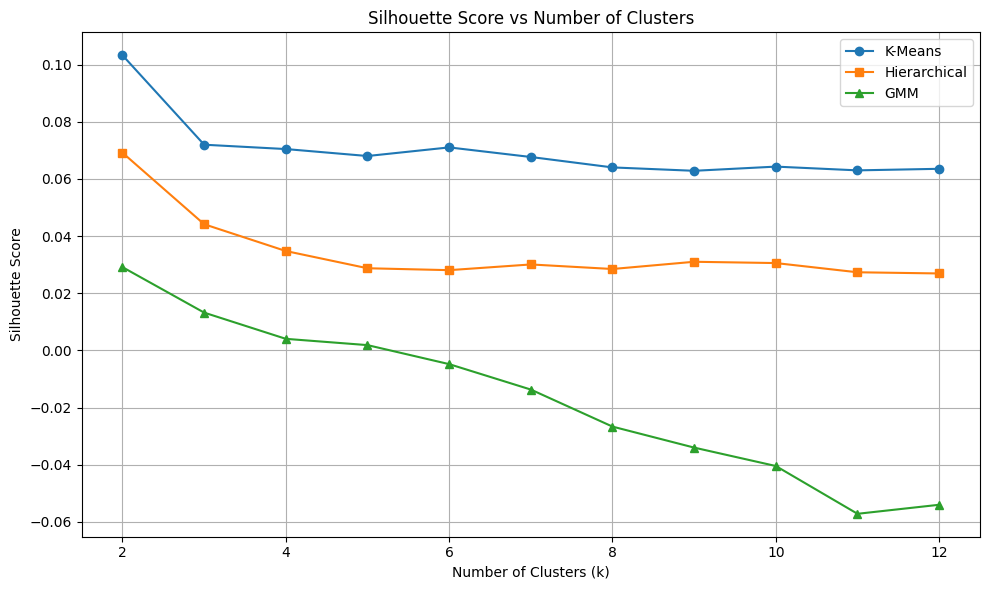

In [ ]:
X_processed = X_processed.toarray() if hasattr(X_processed, "toarray") else X_processed

# PCA
pca = PCA(n_components=0.95)
X_processed = pca.fit_transform(X_processed)
print(f"Number of components chosen by PCA: {pca.n_components_}")
# K range
k_range = range(2, 13)

kmeans_scores = []
hierarchical_scores = []
gmm_scores = []

for k in k_range:
    # K-Means
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans_labels = kmeans.fit_predict(X_processed)
    kmeans_scores.append(silhouette_score(X_processed, kmeans_labels))

    # Hierarchical
    hierarchical = AgglomerativeClustering(n_clusters=k)
    hierarchical_labels = hierarchical.fit_predict(X_processed)
    hierarchical_scores.append(silhouette_score(X_processed, hierarchical_labels))

    # GMM
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm_labels = gmm.fit_predict(X_processed)
    gmm_scores.append(silhouette_score(X_processed, gmm_labels))

# Results
print("Silhouette Scores (K=2 to 12):")
print("K  | K-Means  | Hierarchical |    GMM")
print("---|----------|--------------|--------")
for i, k in enumerate(k_range):
    print(f"{k:2d} | {kmeans_scores[i]:8.4f} | {hierarchical_scores[i]:12.4f} | {gmm_scores[i]:6.4f}")

# Plot
plt.figure(figsize=(10, 6))
plt.plot(k_range, kmeans_scores, label='K-Means', marker='o')
plt.plot(k_range, hierarchical_scores, label='Hierarchical', marker='s')
plt.plot(k_range, gmm_scores, label='GMM', marker='^')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Processed feature matrix shape: (1000, 36)
HDBSCAN silhouette score: 0.1323


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/


Silhouette Scores (k = 2…12):
k | GMM+FA | Spectral | Hierarchical (cosine)
 2 |  0.1053  |  0.5017  |  0.7490
 3 |  0.1879  |  0.1581  |  0.7411
 4 |  0.2371  |  0.0582  |  0.2823
 5 |  0.2353  |  0.0625  |  0.1542
 6 |  0.2049  |  0.0706  |  0.1424
 7 |  0.2070  |  0.0849  |  0.1400
 8 |  0.2310  |  0.1009  |  0.0890
 9 |  0.2355  |  0.1191  |  0.1087
10 |  0.2210  |  0.1376  |  0.1054
11 |  0.2372  |  0.1215  |  0.1056
12 |  0.2457  |  0.1083  |  0.1237


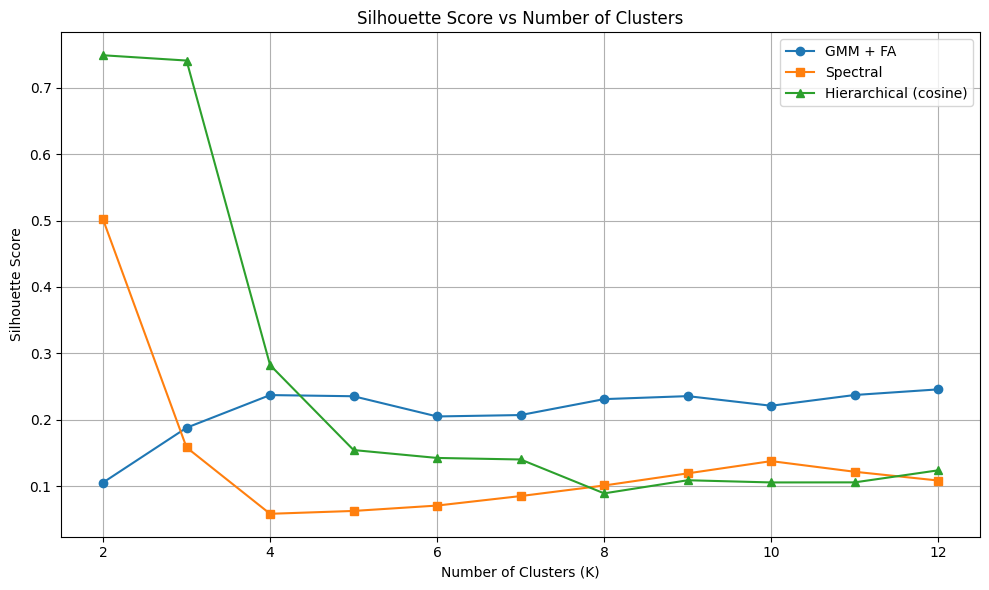

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ma


KMeans Inertia (Elbow):
K=2: inertia=33941.06
K=3: inertia=33139.74
K=4: inertia=32234.09
K=5: inertia=30737.44
K=6: inertia=30520.95
K=7: inertia=29425.39
K=8: inertia=28577.86
K=9: inertia=26109.98
K=10: inertia=25805.72
K=11: inertia=27192.05
K=12: inertia=25292.95

Davies-Bouldin Scores (lower is better):
K | GMM+FA | Spectral | Hierarchical (cosine)
---|--------|----------|---------------------
 2 | 3.1466 |   0.7773 |              0.7773
 3 | 2.1930 |   1.7378 |              0.6825
 4 | 1.7777 |   2.2976 |              1.4343
 5 | 1.6411 |   3.0276 |              1.9425
 6 | 1.6474 |   2.9051 |              2.0745
 7 | 1.4161 |   2.6045 |              1.8716
 8 | 1.3192 |   2.5679 |              2.0018
 9 | 1.3208 |   2.4533 |              2.1018
10 | 1.4236 |   2.1269 |              2.2869
11 | 1.4099 |   2.0954 |              2.3023
12 | 1.5085 |   2.1369 |              2.3615


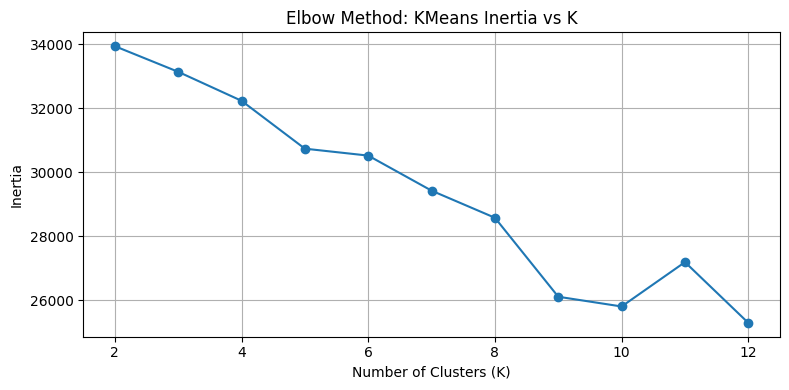

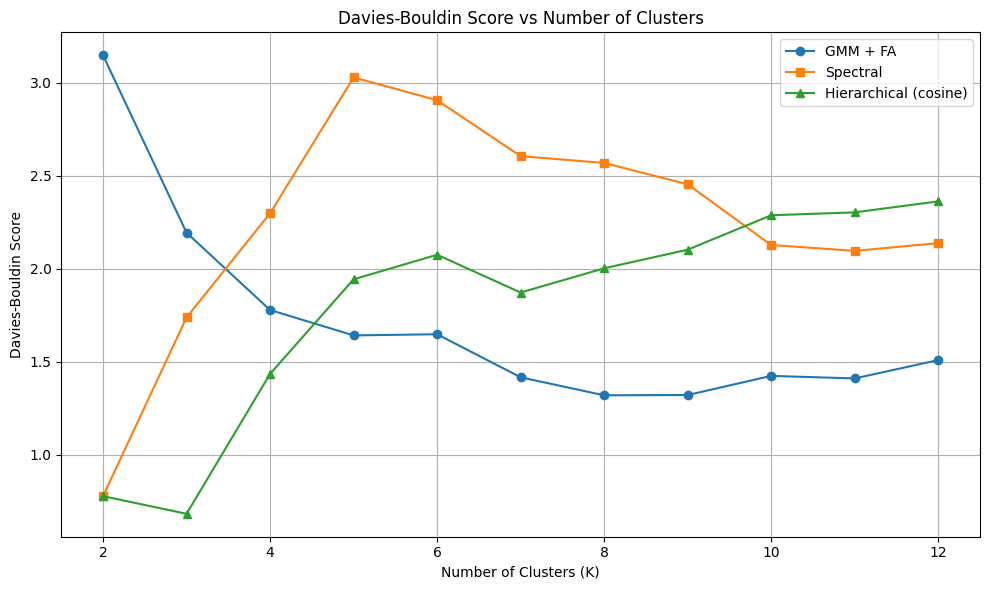

In [ ]:
# Assume df_complete is already defined as in your snippet
num_features = ['age', 'mood', 'stress_level', 'sleep_hours', 'screen_time_hours',
                'social_interaction_rating', 'support_feeling']
cat_features = ['gender', 'country', 'grade', 'used_ai_today', 'ai_tool',
                'journaled_today', 'meditated_today', 'exercised_today']

# Ensure booleans are ints
bool_cols = ['used_ai_today', 'journaled_today', 'meditated_today', 'exercised_today']
for col in bool_cols:
    df_complete[col] = df_complete[col].astype(int)

num_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
cat_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer([
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])

# Fit & transform
X_processed = preprocessor.fit_transform(df_complete)
print(f"Processed feature matrix shape: {X_processed.shape}")

# --- 2. Standardize for distance-based methods ---
scaler = StandardScaler(with_mean=False)
# with_mean=False because X_processed may be sparse after one-hot
X_scaled = scaler.fit_transform(X_processed)

# --- 3. HDBSCAN (no k range) ---
hdb = hdbscan.HDBSCAN(min_cluster_size=10)
hdb_labels = hdb.fit_predict(X_scaled)
# Remove noise points (-1) for silhouette
mask = hdb_labels != -1
if mask.sum() > 1:
    hdb_score = silhouette_score(X_scaled[mask], hdb_labels[mask])
else:
    hdb_score = np.nan
print(f"HDBSCAN silhouette score: {hdb_score:.4f}")

# Prepare k range
k_range = range(2, 13)
spectral_scores = []
hier_cosine_scores = []
gmm_fa_scores = []

# --- 4. GMM + Factor Analysis ---
fa = FactorAnalysis(n_components=10, random_state=42)
X_fa = fa.fit_transform(X_scaled)

for k in k_range:
    gmm = GaussianMixture(n_components=k, random_state=42)
    labels = gmm.fit_predict(X_fa)
    gmm_fa_scores.append(silhouette_score(X_fa, labels))

# --- 5. Spectral Clustering ---
for k in k_range:
    spec = SpectralClustering(n_clusters=k,
                              affinity='nearest_neighbors',
                              n_neighbors=10,
                              random_state=42,
                              n_init=5)
    labels = spec.fit_predict(X_scaled)
    spectral_scores.append(silhouette_score(X_scaled, labels))

# --- 6. Hierarchical with Cosine Distance (fixed) ---
# Precompute pairwise cosine distance matrix
cos_dist = cosine_distances(X_scaled)

hier_cosine_scores = []
for k in k_range:
    hier = AgglomerativeClustering(
        n_clusters=k,
        metric='precomputed',    # was affinity='precomputed'
        linkage='average'
    )
    labels = hier.fit_predict(cos_dist)
    hier_cosine_scores.append(
        silhouette_score(X_scaled, labels, metric='cosine')
    )

# --- 7. Print summary ---
print("\nSilhouette Scores (k = 2…12):")
print("k | GMM+FA | Spectral | Hierarchical (cosine)")
for i, k in enumerate(k_range):
    print(f"{k:2d} |  {gmm_fa_scores[i]:.4f}  |  {spectral_scores[i]:.4f}  |  {hier_cosine_scores[i]:.4f}")

k_vals = list(k_range)

plt.figure(figsize=(10, 6))
plt.plot(k_vals, gmm_fa_scores,    marker='o', label='GMM + FA')
plt.plot(k_vals, spectral_scores,  marker='s', label='Spectral')
plt.plot(k_vals, hier_cosine_scores, marker='^', label='Hierarchical (cosine)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 8. Elbow method (KMeans inertia)
inertia_scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia_scores.append(km.inertia_)

# 9. Davies-Bouldin scores
from sklearn.metrics import davies_bouldin_score

db_gmm_fa = [davies_bouldin_score(X_fa, GaussianMixture(n_components=k, random_state=42).fit_predict(X_fa))
             for k in k_range]
db_spectral = [davies_bouldin_score(X_scaled, SpectralClustering(n_clusters=k,
                      affinity='nearest_neighbors', n_neighbors=10,
                      random_state=42, n_init=5).fit_predict(X_scaled))
               for k in k_range]
db_hier_cos = [davies_bouldin_score(X_scaled,
              AgglomerativeClustering(n_clusters=k, metric='precomputed',
                                      linkage='average').fit_predict(cos_dist))
               for k in k_range]

# Print inertia
print("\nKMeans Inertia (Elbow):")
for k, val in zip(k_range, inertia_scores):
    print(f"K={k}: inertia={val:.2f}")

# Print DB scores
print("\nDavies-Bouldin Scores (lower is better):")
print("K | GMM+FA | Spectral | Hierarchical (cosine)")
print("---|--------|----------|---------------------")
for i, k in enumerate(k_range):
    print(f"{k:2d} | {db_gmm_fa[i]:6.4f} | {db_spectral[i]:8.4f} | {db_hier_cos[i]:19.4f}")

# Elbow plot
plt.figure(figsize=(8,4))
plt.plot(list(k_range), inertia_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method: KMeans Inertia vs K')
plt.grid(True)
plt.tight_layout()
plt.show()

# Davies-Bouldin plot
plt.figure(figsize=(10,6))
plt.plot(list(k_range), db_gmm_fa,   marker='o', label='GMM + FA')
plt.plot(list(k_range), db_spectral, marker='s', label='Spectral')
plt.plot(list(k_range), db_hier_cos, marker='^', label='Hierarchical (cosine)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Davies-Bouldin Score')
plt.title('Davies-Bouldin Score vs Number of Clusters')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## 1. Elbow Method (KMeans Inertia)
- **Elbow at K≈5–6** (after K=5 inertia drop flattens)  
- Secondary bend at K≈9 likely overfitting  

## 2. Silhouette Scores
| Method                  | Best K | Score  |
|-------------------------|-------:|-------:|
| Hierarchical (cosine)   |      2 |  0.75  |
| Spectral                |      2 |  0.50  |
| GMM + FactorAnalysis    |     12 |  0.25  |

## 3. Davies–Bouldin Index (lower = better)
| Method                  | Best K | DB     |
|-------------------------|-------:|-------:|
| Hierarchical (cosine)   |      3 |  0.68  |
| Spectral                |      2 |  0.78  |
| GMM + FactorAnalysis    |      8 |  1.32  |

## 4. HDBSCAN
- **Silhouette ≈ 0.13** → weak global structure under defaults  

---

**Conclusion:**  
- **K=2–3 hierarchical (cosine)** yields the clearest separation.  
- **Spectral** confirms a binary split.  
- **GMM+FA** at K=8–9 offers finer but less distinct clusters.  
- **HDBSCAN** needs tuning for meaningful groups.  

#### K=3 + Hierarchical (cosine) is chosen

In [ ]:
cos_dist = cosine_distances(X_scaled)

# 2. Fit hierarchical clustering with k=3
hier3 = AgglomerativeClustering(
    n_clusters=3,
    metric='precomputed',
    linkage='average'
)
labels3 = hier3.fit_predict(cos_dist)

# 3. Attach the cluster labels to df_complete
df_complete['cluster'] = labels3

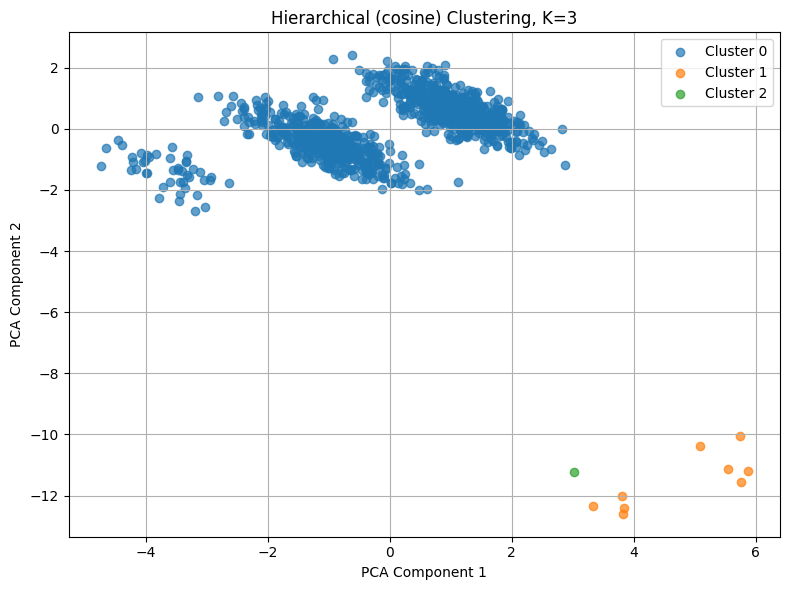

In [ ]:
# 1. Reduce to 2D for plotting
pca_vis = PCA(n_components=2, random_state=42)
X_vis = pca_vis.fit_transform(X_scaled)     # X_scaled from your clustering pipeline

# 2. Scatter plot, coloring by cluster label
plt.figure(figsize=(8, 6))
for label in sorted(df_complete['cluster'].unique()):
    mask = df_complete['cluster'] == label
    plt.scatter(
        X_vis[mask, 0],
        X_vis[mask, 1],
        label=f'Cluster {label}',
        alpha=0.7
    )

# 3. Labels and legend
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Hierarchical (cosine) Clustering, K=3')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Compute and display the count of samples in each cluster
counts = df_complete['cluster'].value_counts().sort_index()
print("Samples per cluster:")
for cluster_label, count in counts.items():
    print(f"Cluster {cluster_label}: {count}")

Samples per cluster:
Cluster 0: 990
Cluster 1: 9
Cluster 2: 1


## Conclusion

While mathematically accurate (enough), the method exposed in this notebook is flawed when it comes to taking decisions regarding Teen Psychology. Therefore a second Method is exposed in a second Notebook.